In [73]:
#IMPORT LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# IMPORT DATASET
dataset = pd.read_csv("F:/Yoshops/Task_2/orders_2020_2021_DataSet_Updated.csv")
data_review = pd.read_csv("F:/Yoshops/Task_2/review_dataset.csv")

In [75]:
#CLEAN DATASET data_review
data_review = data_review.dropna()
data_review = data_review.drop_duplicates()
data_review.head()

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0 star rating
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0 star rating
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9 star rating
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating


In [76]:
# Make Reviews clearly in terms of stars--> numerical to perform task while entering 1
data_review['stars'] = data_review['stars'].replace(['5.0 star rating'],5)
data_review['stars'] = data_review['stars'].replace(['4.9 star rating'],4.9)
data_review['stars'] = data_review['stars'].replace(['4.8 star rating'],4.8)
data_review['stars'] = data_review['stars'].replace(['4.7 star rating'],4.7)
data_review['stars'] = data_review['stars'].replace(['4.6 star rating'],4.6)
data_review['stars'] = data_review['stars'].replace(['4.5 star rating'],4.5)
data_review['stars'] = data_review['stars'].replace(['4.3 star rating'],4.3)
data_review['stars'] = data_review['stars'].replace(['4.2 star rating'],4.2)
data_review['stars'] = data_review['stars'].replace(['4.0 star rating'],4)
data_review['stars'] = data_review['stars'].replace(['3.3 star rating'],3.3)
data_review['stars'] = data_review['stars'].replace(['3.0 star rating'],3)
data_review['stars'] = data_review['stars'].replace(['2.3 star rating'],2.3)
data_review.head()

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9


In [77]:
dataset.shape

(3039, 38)

In [78]:
dataset.isnull().sum()

Order #                               0
Fulfillment Date and Time Stamp    2801
Currency                              0
Subtotal                              0
Shipping Method                       0
Shipping Cost                         0
Tax Method                         3038
Taxes                                 0
Total                                 0
Coupon Code                        2797
Coupon Code Name                   2797
                                      0
Billing Name                       2664
Billing Country                    2664
Billing Street Address             2664
Billing Street Address 2           2811
Billing City                       2664
Billing State                      2670
Billing Zip                        2664
Shipping Name                         0
Shipping Country                      0
Shipping Street Address              19
Shipping Street Address 2           982
Shipping City                        19
Shipping State                       22


In [80]:
# Since certain columns have null values for all obervation........one can delete the entire column
dataset = dataset.drop(['Download Status', 'Special Instructions', 'Gift Cards', 'Tax Method'], axis=1)
dataset.head()

,Order #,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,Taxes,Total,Coupon Code,Coupon Code Name,...,Shipping Zip,Payment Method,Tracking #,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
0,R121113121,NaN,INR,2299,Ships Free,0,0.0,2299,NaN,NaN,...,442505,NaN,NaN,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,PL0093416,NaN,NaN,1,2299,physical
1,R472890631,NaN,INR,2299,Ships Free,0,0.0,2299,NaN,NaN,...,442505,NaN,NaN,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,PL0093416,NaN,NaN,1,2299,physical
2,R004476488,NaN,INR,2299,Ships Free,0,0.0,2299,NaN,NaN,...,442505,NaN,NaN,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,PL0093416,NaN,NaN,1,2299,physical
3,R526038353,NaN,INR,2299,Ships Free,0,0.0,2299,NaN,NaN,...,442505,NaN,NaN,Falcon Drone Four Axis Aircraft with 2.4 GHz R...,PL0093416,NaN,NaN,1,2299,physical
4,R658530771,NaN,INR,349,Ships Free,0,0.0,349,NaN,NaN,...,110025,NaN,NaN,Barbie Doll (pink),PL00098,NaN,NaN,1,349,physical


In [81]:
# To get Payment mode separated from rest of things in after removing unwanted NaN values in the column of Payment Method
df1= dataset['Payment Method'].dropna()
df1 = df1.str.split('₹',expand=True)
df1.head()

,0,1,2
26,CCAvenue,999.00,None
137,CCAvenue,219.00,None
138,CCAvenue,"1,499.00",None
146,CCAvenue,349.00,None
147,CCAvenue,799.00,None


In [82]:
#To remove the symbol of ₹ 
dataset = dataset.replace('\₹ ', '', regex=True)

In [83]:
# To extract data of top consumer state
df2 = dataset.groupby('Shipping State')['LineItem Sale Price'].sum()
df2 = df2.sort_values(ascending=False)#sorting in descending order

In [84]:
# To extract data of top consumer city
df3 = dataset.groupby(['Shipping City'])['LineItem Sale Price'].sum().nlargest(30)
df3 = df3.sort_values(ascending=False)

In [85]:
# To do analysis of reviews of different product categories
df4 = data_review.groupby(['category'])['stars'].mean()

In [86]:
# Extract columns Order and Fulfillment Date and Time Stamp to analyse -- Number of Orders Per Month Per Year
df5 = dataset[['Order #', 'Fulfillment Date and Time Stamp']].dropna()
# Split the column "Fulfillment Date and Time Stamp" properly into year month date and hour
df5['Dates'] = pd.to_datetime(df5['Fulfillment Date and Time Stamp']).dt.date
df5['Time'] = pd.to_datetime(df5['Fulfillment Date and Time Stamp']).dt.time
df5['year'] = pd.DatetimeIndex(df5['Dates']).year
df5['month'] = pd.DatetimeIndex(df5['Dates']).month
df5['day'] = pd.DatetimeIndex(df5['Dates']).day
df5['time_hour'] = pd.to_datetime(df5['Fulfillment Date and Time Stamp']).dt.hour
# Rename months in an year
df5['month'] = df5['month'].replace([1],'January')
df5['month'] = df5['month'].replace([2],'February')
df5['month'] = df5['month'].replace([3],'March')
df5['month'] = df5['month'].replace([4],'April')
df5['month'] = df5['month'].replace([5],'May')
df5['month'] = df5['month'].replace([6],'June')
df5['month'] = df5['month'].replace([7],'July')
df5['month'] = df5['month'].replace([8],'August')
df5['month'] = df5['month'].replace([9],'September')
df5['month'] = df5['month'].replace([10],'October')
df5['month'] = df5['month'].replace([11],'November')
df5['month'] = df5['month'].replace([12],'December')

In [87]:
# Combine required columns of the given datsets(dataset and data_review) together after cleaning them to complete task 8
df6 = dataset[['Order #', 'Fulfillment Date and Time Stamp']].dropna()
df6.reset_index(inplace = True)
df7 = data_review[['status', 'stars']].dropna()
df7.reset_index(inplace = True)
df6 = df6[['Order #', 'Fulfillment Date and Time Stamp']]
df7 = df7[['status', 'stars']]
df8 = df6.join(df7)

In [88]:
# Now extract year and month column fro th column 'Fulfillment Date and Time Stamp'
df8['Dates'] = pd.to_datetime(df8['Fulfillment Date and Time Stamp']).dt.date
df8['Time'] = pd.to_datetime(df8['Fulfillment Date and Time Stamp']).dt.time
df8['year'] = pd.DatetimeIndex(df8['Dates']).year
df8['month'] = pd.DatetimeIndex(df8['Dates']).month

In [89]:
# Find average, minimum and maximum stars obtained in different months per year
df9 = df8.groupby(['year', 'month']).agg({'stars': ['mean', 'min', 'max']})
df9.columns = ['Review_Stars_mean', 'Review_Stars_min', 'Review_Stars_max']
df9 = df9.reset_index()
grouped_multiple = df9

In [90]:
# Rename months in an year
grouped_multiple['month'] = grouped_multiple['month'].replace([1],'January')
grouped_multiple['month'] = grouped_multiple['month'].replace([2],'February')
grouped_multiple['month'] = grouped_multiple['month'].replace([3],'March')
grouped_multiple['month'] = grouped_multiple['month'].replace([4],'April')
grouped_multiple['month'] = grouped_multiple['month'].replace([5],'May')
grouped_multiple['month'] = grouped_multiple['month'].replace([6],'June')
grouped_multiple['month'] = grouped_multiple['month'].replace([7],'July')
grouped_multiple['month'] = grouped_multiple['month'].replace([8],'August')
grouped_multiple['month'] = grouped_multiple['month'].replace([9],'September')
grouped_multiple['month'] = grouped_multiple['month'].replace([10],'October')
grouped_multiple['month'] = grouped_multiple['month'].replace([11],'November')
grouped_multiple['month'] = grouped_multiple['month'].replace([12],'December')


Enter a number: 7


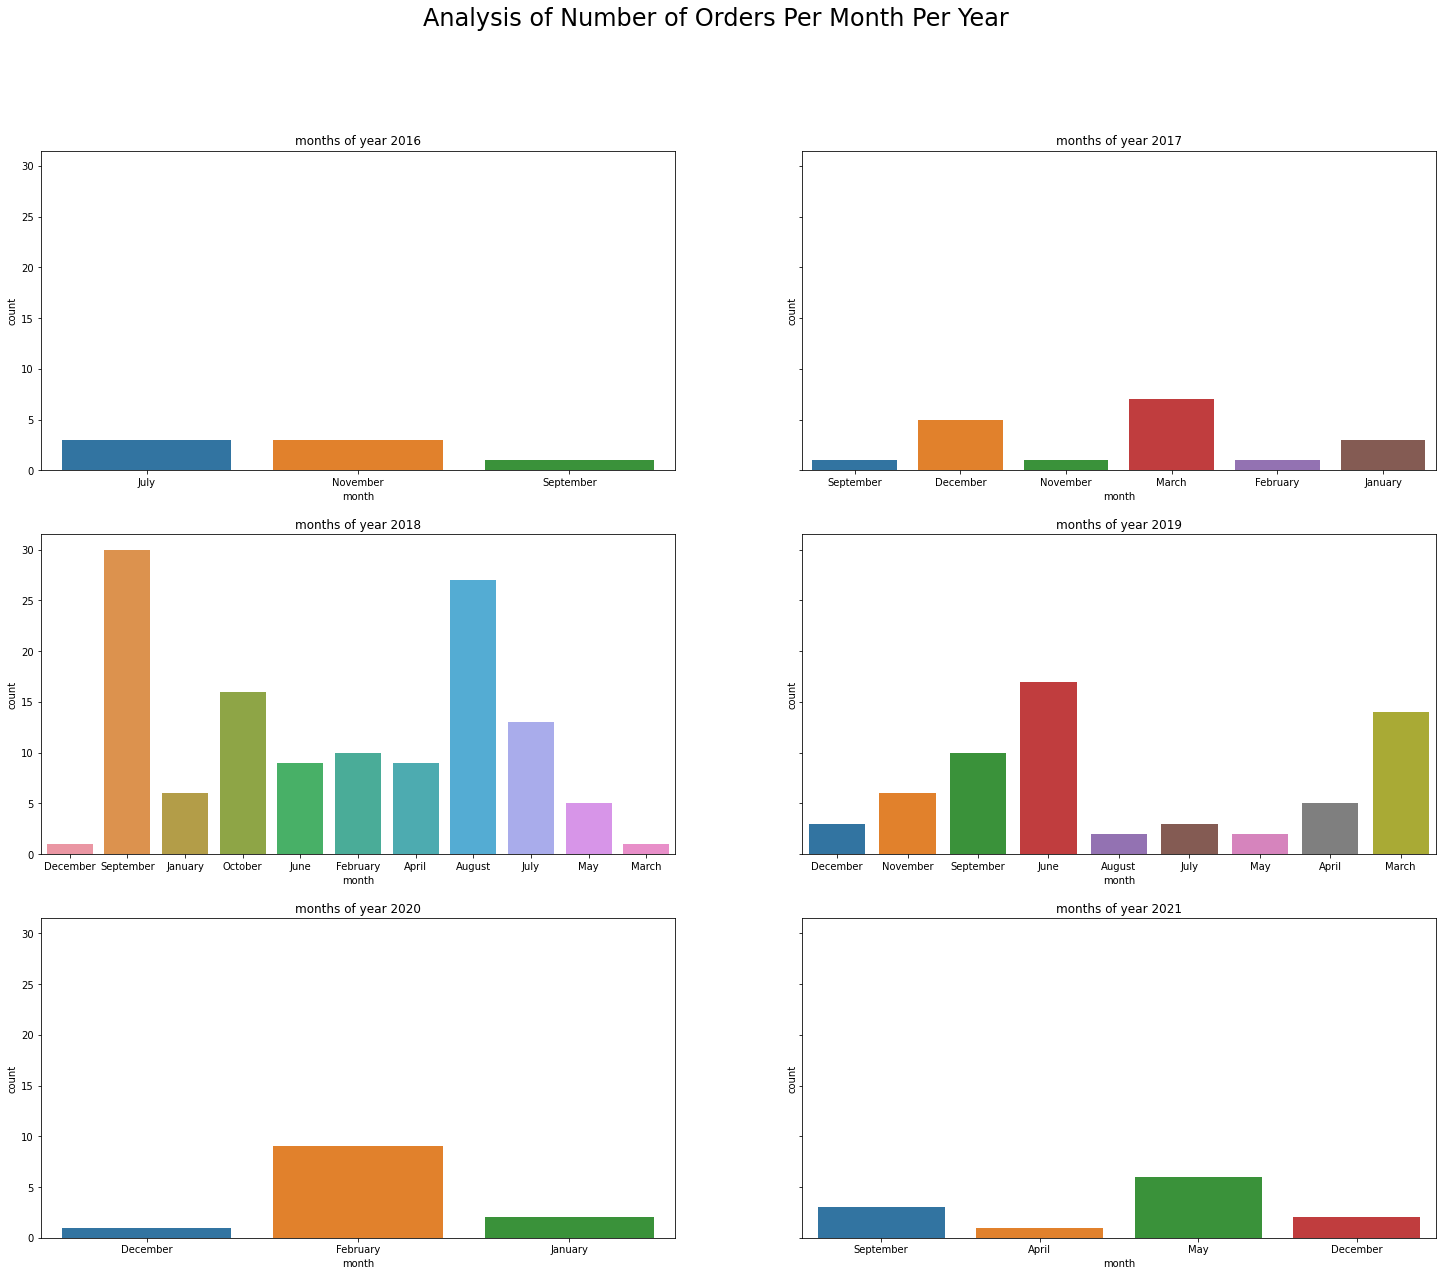

In [129]:
# Taking input from the user as integer
num = int(input("Enter a number: "))

#Using if-elif choose any number between 1 to 10
if(num==1):
    # Enter 1 to see the analysis of Reviews given by Customers
    plt.figure(figsize=(15,6))
    plt.title( "Analysis of Reviews given by Customers" , size = 24 )
    sns.countplot(data_review['stars'])
    plt.show()
    
    
elif(num==2):
    # Enter 2 to see the analysis of different payment methods used by the Customers
    plt.title( "Analysis of different payment methods used by the Customers" , size = 24 )
    sns.countplot(df1[0])
    plt.show()
    
    
elif (num == 3):
    plt.title("Analysis of Top Consumer States of India", size=24)
    df2.plot.bar(figsize=(20, 10), ylabel='Consumer States in Descending order')
    plt.show()
    
    

elif (num == 4):
    plt.title( "Analysis of Top Consumer Cities of India" , size = 18)
    df3.plot.bar(figsize=(15, 8), ylabel='Consumer Cities in Descending order')
    plt.show()
    

elif(num==5):
    # Enter 5 to see the analysis of Top Selling Product Categories
    plt.title( "Analysis of Top Selling Product Categories" , size = 24 )
    data_review['category'].value_counts()[:20].plot(kind='barh')
    plt.show()
   

elif(num==6):
    # Enter 6 to see the analysis of Reviews for All Product Categories
    df4.plot.bar(title="Bar Chart",x='Product Category',y='score',figsize=(60,30))
    plt.title( "Analysis of Reviews for All Product Categories" , size = 24 )
    plt.show()
   

elif(num==7):
    fig, axes = plt.subplots(3, 2, figsize=(25,20), sharey=True)
    fig.suptitle('Analysis of Number of Orders Per Month Per Year', size=24)

    sns.countplot(x='month', data=df5[(df5.year < 2017)], ax=axes[0, 0])
    axes[0, 0].set_title('months of year 2016')

    sns.countplot(x='month', data=df5[(df5.year < 2018) & (df5.year > 2016)], ax=axes[0, 1])
    axes[0, 1].set_title('months of year 2017')

    sns.countplot(x='month', data=df5[(df5.year < 2019) & (df5.year > 2017)], ax=axes[1, 0])
    axes[1, 0].set_title('months of year 2018')

    sns.countplot(x='month', data=df5[(df5.year < 2020) & (df5.year > 2018)], ax=axes[1, 1])
    axes[1, 1].set_title('months of year 2019')

    sns.countplot(x='month', data=df5[(df5.year < 2021) & (df5.year > 2019)], ax=axes[2, 0])
    axes[2, 0].set_title('months of year 2020')

    sns.countplot(x='month', data=df5[(df5.year < 2022) & (df5.year > 2020)], ax=axes[2, 1])
    axes[2, 1].set_title('months of year 2021')
    plt.savefig('Order&Review_Charts.pdf')

    #plt.show()

elif(num==8):
    # plot grouped bar chart
    
    df10 = grouped_multiple.pivot(index='year', columns='month', values='Review_Stars_mean')
    df10.plot(kind='bar', figsize=(15, 8),
              color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'black', 'deeppink', 'pink',
                     'lawngreen', 'maroon'])
    plt.xlabel('Month per Year')
    plt.ylabel('Average Stars Obtained')
    plt.title('Average Star Obtained per Month per Year', size=24)
    plt.show()

    df12 = grouped_multiple.pivot(index='year', columns='month', values='Review_Stars_max')
    df12.plot(kind='bar', figsize=(15, 8),
              color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'black', 'deeppink', 'pink',
                     'lawngreen', 'maroon'])

    plt.xlabel('Month per Year')
    plt.ylabel('Maximum Star Obtained')
    plt.title('Maximum Star Obtained per Month per Year', size=24)
    plt.show()

    df11 = grouped_multiple.pivot(index='year', columns='month', values='Review_Stars_min')
    df11.plot(kind='bar', figsize=(15, 8),
              color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'black', 'deeppink', 'pink',
                     'lawngreen', 'maroon'])
    plt.xlabel('Month per Year')
    plt.ylabel('Minimum Star Obtained')
    plt.title('Minimum Star Obtained per Month per Year', size=24)
    plt.savefig('Order&Review_Charts.pdf')
    #plt.show()

elif(num==9):
    # Enter 9 to see the analysis of Number of Orders Across Parts of a Day
    plt.hist(df5['time_hour'],  edgecolor="yellow", color="green", bins=6)
    plt.xlabel( "Parts of a day in categories of hours" , size = 12 )
    # Set label for y-axis
    plt.ylabel( "Number of Orders" , size = 12 )
    # Set title for figure
    plt.title( "Analysis of Number of Orders Across Parts of a Day" , size = 24 )
    
    # Display figure
    #plt.show()
    plt.savefig('Order&Review_Charts.pdf')

elif (num == 10):
    
#Chart 1
    plt.figure(figsize=(15,16))
    plt.title( "Analysis of Reviews given by Customers" , size = 24 )
    sns.countplot(data_review['stars'])
    plt.show()
#Chart 2
    plt.title( "Analysis of different payment methods used by the Customers" , size = 24 )
    sns.countplot(df1[0])
    plt.show()
#Chart 3
    plt.title("Analysis of Top Consumer States of India", size=24)
    df2.plot.bar(figsize=(20, 10), ylabel='Consumer States in Descending order')
    plt.show()

#Chart 4
    plt.title( "Analysis of Top Consumer Cities of India" , size = 24 )
    df3.plot.bar(figsize=(20, 10), ylabel='Consumer Cities in Descending order')
    plt.show()
#Chart 5
    plt.title( "Analysis of Top Selling Product Categories" , size = 24 )
    data_review['category'].value_counts()[:20].plot(kind='barh')
    plt.show()
#Chart 6
    df4.plot.bar(title="Bar Chart",x='Product Category',y='score',figsize=(60,30))
    plt.title( "Analysis of Reviews for All Product Categories" , size = 24 )
    plt.xlabel("Product Category")
    plt.ylabel("Score")
    plt.show()
#Chart 7
    fig, axes = plt.subplots(3, 2, figsize=(25,20), sharey=True)
    fig.suptitle('Analysis of Number of Orders Per Month Per Year', size=24)

    sns.countplot(x='month', data=df5[(df5.year < 2017)], ax=axes[0, 0])
    axes[0, 0].set_title('months of year 2016')

    sns.countplot(x='month', data=df5[(df5.year < 2018) & (df5.year > 2016)], ax=axes[0, 1])
    axes[0, 1].set_title('months of year 2017')

    sns.countplot(x='month', data=df5[(df5.year < 2019) & (df5.year > 2017)], ax=axes[1, 0])
    axes[1, 0].set_title('months of year 2018')

    sns.countplot(x='month', data=df5[(df5.year < 2020) & (df5.year > 2018)], ax=axes[1, 1])
    axes[1, 1].set_title('months of year 2019')

    sns.countplot(x='month', data=df5[(df5.year < 2021) & (df5.year > 2019)], ax=axes[2, 0])
    axes[2, 0].set_title('months of year 2020')

    sns.countplot(x='month', data=df5[(df5.year < 2022) & (df5.year > 2020)], ax=axes[2, 1])
    axes[2, 1].set_title('months of year 2021')

    plt.show()
#Chart 8
    df10 = grouped_multiple.pivot(index='year', columns='month', values='Review_Stars_mean')
    df10.plot(kind='bar', figsize=(15, 8),
              color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'black', 'deeppink', 'pink',
                     'lawngreen', 'maroon'])
    plt.xlabel('Month per Year')
    plt.ylabel('Average Stars Obtained')
    plt.title('Average Star Obtained per Month per Year', size=24)
    plt.show()

    df12 = grouped_multiple.pivot(index='year', columns='month', values='Review_Stars_max')
    df12.plot(kind='bar', figsize=(15, 8),
              color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'black', 'deeppink', 'pink',
                     'lawngreen', 'maroon'])

    plt.xlabel('Month per Year')
    plt.ylabel('Maximum Star Obtained')
    plt.title('Maximum Star Obtained per Month per Year', size=24)
    plt.show()

    df11 = grouped_multiple.pivot(index='year', columns='month', values='Review_Stars_min')
    df11.plot(kind='bar', figsize=(15, 8),
              color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'black', 'deeppink', 'pink',
                     'lawngreen', 'maroon'])
    plt.xlabel('Month per Year')
    plt.ylabel('Minimum Star Obtained')
    plt.title('Minimum Star Obtained per Month per Year', size=24)
    plt.show()    
#Chart 9
    plt.hist(df5['time_hour'],  edgecolor="yellow", color="green", bins=6)
    plt.xlabel( "Parts of a day in categories of hours" , size = 12 )
    # Set label for y-axis
    plt.ylabel( "Number of Orders" , size = 12 )
    # Set title for figure
    plt.title( "Analysis of Number of Orders Across Parts of a Day" , size = 24 )
    # Display figure
    plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


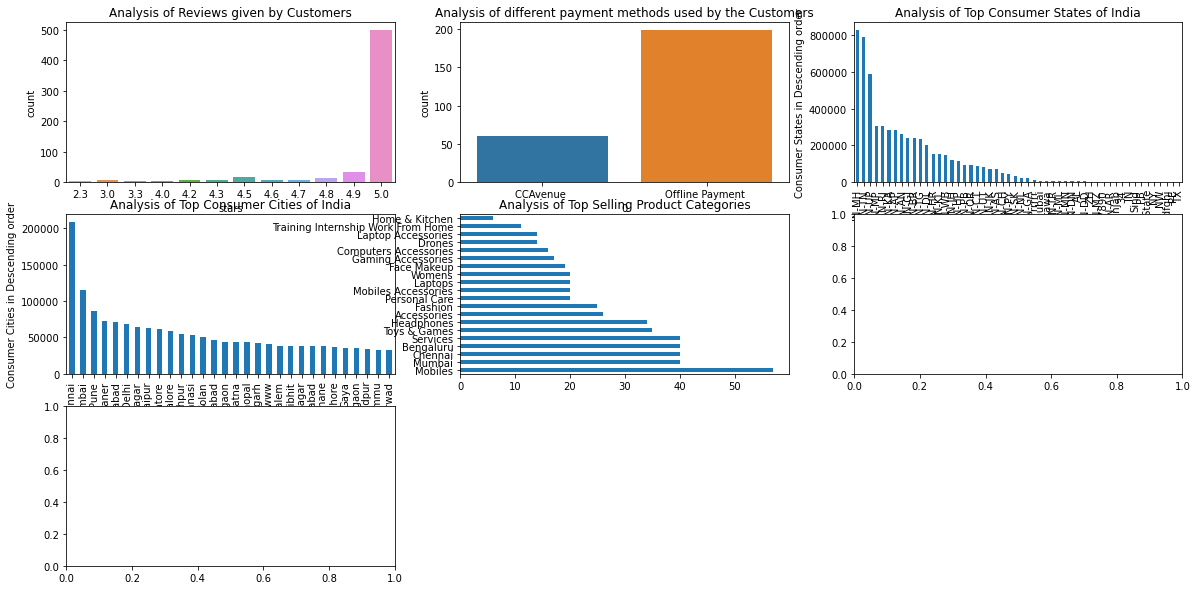

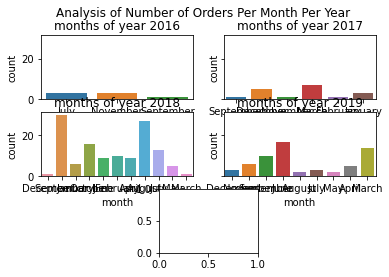

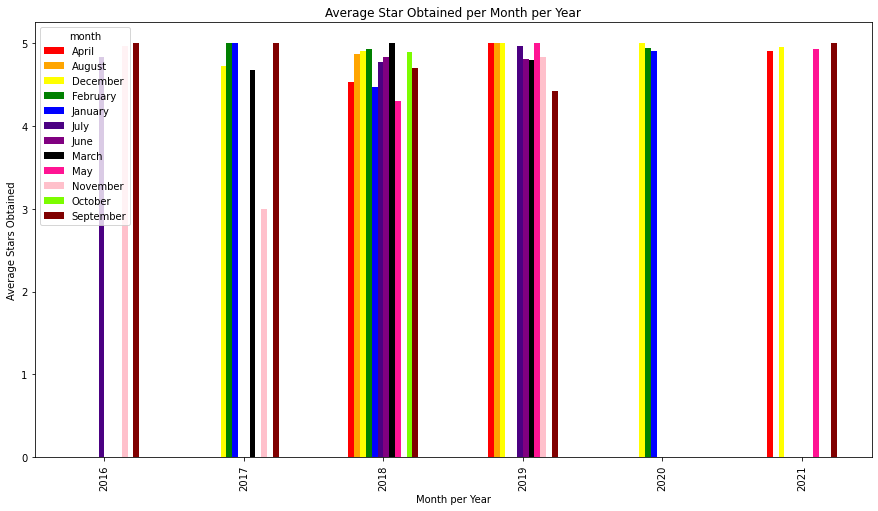

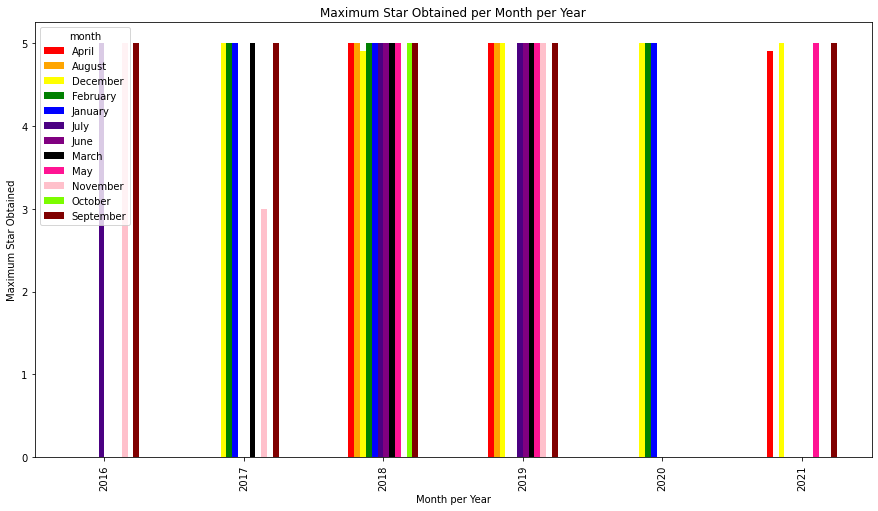

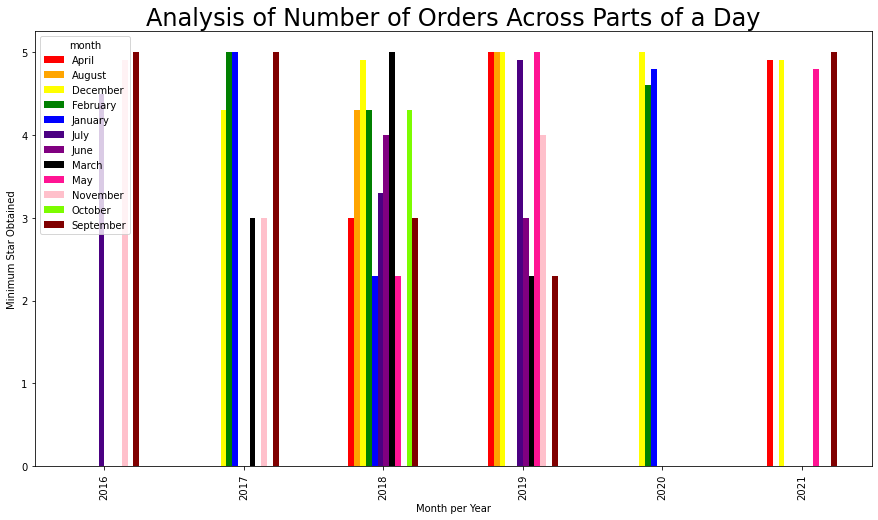

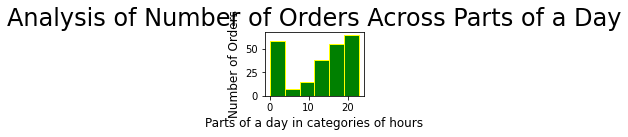

<Figure size 432x288 with 0 Axes>

In [112]:
plt.figure(figsize=(25,35))

plt.subplot(3,3,1)
plt.title( "Analysis of Reviews given by Customers")
sns.countplot(data_review['stars'])

plt.subplot(3,3,2)
plt.title( "Analysis of different payment methods used by the Customers")
sns.countplot(df1[0])

plt.subplot(3,3,3)
plt.title("Analysis of Top Consumer States of India")
df2.plot.bar(figsize=(20, 10), ylabel='Consumer States in Descending order')

plt.subplot(3,3,4)
plt.title( "Analysis of Top Consumer Cities of India")
df3.plot.bar(figsize=(20, 10), ylabel='Consumer Cities in Descending order')

plt.subplot(3,3,5)
plt.title( "Analysis of Top Selling Product Categories" )
data_review['category'].value_counts()[:20].plot(kind='barh')

plt.subplot(3,3,6)
#plt.title( "Analysis of Top Selling Product Categories" )


plt.subplot(3,3,7)
fig, axes = plt.subplots(3, 2, sharey=True)
fig.suptitle('Analysis of Number of Orders Per Month Per Year')

sns.countplot(x='month', data=df5[(df5.year < 2017)], ax=axes[0, 0])
axes[0, 0].set_title('months of year 2016')

sns.countplot(x='month', data=df5[(df5.year < 2018) & (df5.year > 2016)], ax=axes[0, 1])
axes[0, 1].set_title('months of year 2017')

sns.countplot(x='month', data=df5[(df5.year < 2019) & (df5.year > 2017)], ax=axes[1, 0])
axes[1, 0].set_title('months of year 2018')

sns.countplot(x='month', data=df5[(df5.year < 2020) & (df5.year > 2018)], ax=axes[1, 1])
axes[1, 1].set_title('months of year 2019')

sns.countplot(x='month', data=df5[(df5.year < 2021) & (df5.year > 2019)], ax=axes[2, 0])
axes[2, 0].set_title('months of year 2020')

sns.countplot(x='month', data=df5[(df5.year < 2022) & (df5.year > 2020)], ax=axes[2, 1])
axes[2, 1].set_title('months of year 2021')


plt.subplot(3,3,8)
df10 = grouped_multiple.pivot(index='year', columns='month', values='Review_Stars_mean')
df10.plot(kind='bar', figsize=(15, 8),
              color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'black', 'deeppink', 'pink',
                     'lawngreen', 'maroon'])
plt.xlabel('Month per Year')
plt.ylabel('Average Stars Obtained')
plt.title('Average Star Obtained per Month per Year')
plt.show()

df12 = grouped_multiple.pivot(index='year', columns='month', values='Review_Stars_max')
df12.plot(kind='bar', figsize=(15, 8),
              color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'black', 'deeppink', 'pink',
                     'lawngreen', 'maroon'])

plt.xlabel('Month per Year')
plt.ylabel('Maximum Star Obtained')
plt.title('Maximum Star Obtained per Month per Year')
plt.show()

df11 = grouped_multiple.pivot(index='year', columns='month', values='Review_Stars_min')
df11.plot(kind='bar', figsize=(15, 8),
              color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'black', 'deeppink', 'pink',
                     'lawngreen', 'maroon'])
plt.xlabel('Month per Year')
plt.ylabel('Minimum Star Obtained')
plt.title( "Analysis of Number of Orders Across Parts of a Day" , size = 24 )
plt.show() 
plt.savefig('Order&Review_Charts.pdf')

plt.subplot(3,3,9)
plt.hist(df5['time_hour'],  edgecolor="yellow", color="green", bins=6)
plt.xlabel( "Parts of a day in categories of hours" , size = 12 )
plt.ylabel( "Number of Orders" , size = 12 )
plt.title( "Analysis of Number of Orders Across Parts of a Day" , size = 24 )
plt.show()
plt.savefig('Order&Review_Charts.pdf')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


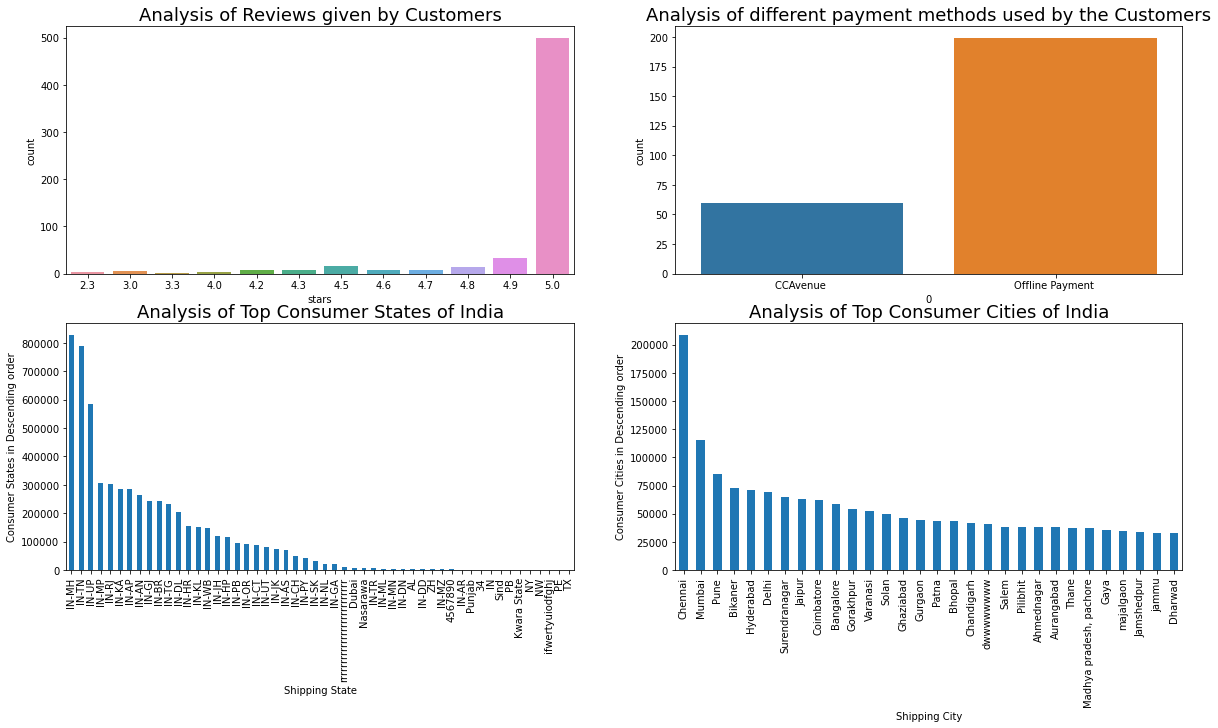

In [93]:
plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
plt.title( "Analysis of Reviews given by Customers", size = 18)
sns.countplot(data_review['stars'])

plt.subplot(2,2,2)
plt.title( "Analysis of different payment methods used by the Customers", size=18)
sns.countplot(df1[0])

plt.subplot(2,2,3)
plt.title("Analysis of Top Consumer States of India", size=18)
df2.plot.bar(figsize=(20, 10), ylabel='Consumer States in Descending order')

plt.subplot(2,2,4)
plt.title( "Analysis of Top Consumer Cities of India", size=18)
df3.plot.bar(figsize=(20, 10), ylabel='Consumer Cities in Descending order')

plt.savefig('Order&Review_Charts.pdf')